# Gradient_Descent_LogisticRegression

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Сначала попробуем написать градиентный спуск на простой квадратичной функции

$$ y = 2*x^2-4*x-3 $$
$$ y^{'} = 4*x-4 $$

По графику и производной видно, что минимум функции достигается при x = 1

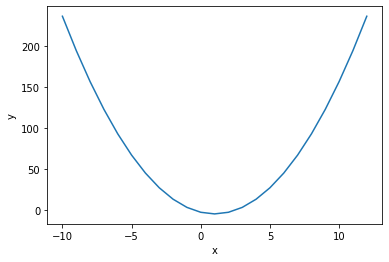

In [24]:
x = np.arange(-10,13,1)
def f(x):
    y = 2*x**2 - 4*x - 3
    return y
y = f(x)

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Присвоим lambda значение = 0.2, и зададим максимальное кол-во итераций = 30. Инициализируем х в точке -1.

In [47]:
df = lambda x: 4*x-4
def gradient_descent(x,learningRate = 0.2, max_iterations = 30):
    x_storage = []
    iteration = 0
    for i in range(max_iterations):
        prev_x = x
        step_size = learningRate * df(x)
        x = prev_x - step_size
        iteration += 1
        print('iteration', iteration)
        print('step_size',step_size)
        x_storage.append(x)
        print(x)
        print('____')
    return x_storage

In [58]:
x = np.random.randint(-5,5)
print('x =', x)
x_value = gradient_descent(x,learningRate = 0.2, max_iterations = 30)

x = 4
iteration 1
step_size 2.4000000000000004
1.5999999999999996
____
iteration 2
step_size 0.47999999999999976
1.1199999999999999
____
iteration 3
step_size 0.09599999999999992
1.024
____
iteration 4
step_size 0.01920000000000002
1.0048
____
iteration 5
step_size 0.0038399999999999324
1.00096
____
iteration 6
step_size 0.0007680000000000576
1.000192
____
iteration 7
step_size 0.00015359999999997598
1.0000384
____
iteration 8
step_size 3.07199999999952e-05
1.00000768
____
iteration 9
step_size 6.143999999963512e-06
1.000001536
____
iteration 10
step_size 1.2288000000637568e-06
1.0000003072
____
iteration 11
step_size 2.457600000838056e-07
1.00000006144
____
iteration 12
step_size 4.915199998123399e-08
1.000000012288
____
iteration 13
step_size 9.83039996071966e-09
1.0000000024576
____
iteration 14
step_size 1.9660799210896586e-09
1.00000000049152
____
iteration 15
step_size 3.9321594869079494e-10
1.000000000098304
____
iteration 16
step_size 7.864322526529578e-11
1.0000000000196607
__

Отрисовав график изменения параметра x, видно, как работает градиентный спуск: когда значение далеко от оптимума, шаг градиента большой (на участке [0,2] отчетливо видны "широкие шаги" градиента), когда же значение близко к оптимуму - шаг градиента становится все меньше и меньше и стремится к 1.

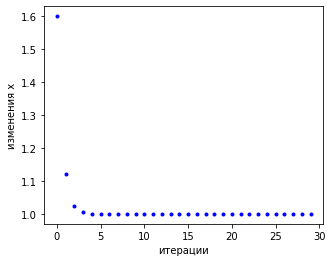

In [61]:
fig,ax = plt.subplots(figsize=(5,4))

ax.set_ylabel('изменения x')
ax.set_xlabel('итерации')
_=ax.plot(range(30),x_value,'b.')

Теперь сделаем то же самое, но для логистической регрессии на примере набора данных Breast Cancer

In [62]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [130]:
cancer = load_breast_cancer()
cancer_data = pd.DataFrame.from_dict(cancer['data'])
cancer_target = pd.DataFrame.from_dict(cancer['target'])

# add intercept
cancer_data.insert(0, 'x_0', 1)

print("cancer_data", cancer_data.shape)
print("cancer_target",cancer_target.shape)
print()

# split to train and test sets
X_train = cancer_data[0:457]
y_train = cancer_target [0:457]
X_test = cancer_data[457:]
y_test = cancer_target [457:]

# create arrays
X_train1 = np.array(X_train.values)
y_train1 = np.array(y_train.values)
X_test1 = np.array(X_test.values)
y_test1 = np.array(y_test.values)

# задаем вектор w из 1
w = np.ones(31) 


w = np.matrix(w)
X = np.matrix(X_train1)
y = np.matrix(y_train1)

print('X', X.shape)
print('y', y.shape)
print('w', w.shape)
print('y_test1', y_test1.shape)

cancer_data (569, 31)
cancer_target (569, 1)

X (457, 31)
y (457, 1)
w (1, 31)
y_test1 (112, 1)


$$\large accuracy(y,\hat{y}) = {\frac{1}{n_{samples}} \sum_{i=0}^{n_{samples}-1}} 1(\hat{y}_i = y_i)$$ 

In [216]:
def accuracy(w,X_test,y_test):
    n = len(X_test)
    z = X_test.dot(w.T)
    prediction = 1/(1 + np.exp(-(z)))> 0.5
    correct =  prediction == y_test
    accuracy = np.sum(correct)/n
    #print('accuracy {:.3f}'.format(accuracy))
    return accuracy
    

In [ ]:
def gradient_descent(X,y,w,learningRate = 0.2, max_iterations = 100):
    sum_w = []
    accuracy_score = []
    all_w_coeff = []
    m = len(y)
    iteration = 1
    for i in range(max_iterations):
        #print('ITERATION', iteration)
        current_w = w
        z = X.dot(current_w.T)
        prediction = 1/(1 + np.exp(-(z)))
        step_size = learningRate * 1/m * (prediction - y).T.dot(X)
        
        #print('current_w',current_w)
        #print('step_size', step_size)
        
        w = current_w - step_size
        #print('step_size',step_size)
        #print('w =', w)
        accuracy_score.append(accuracy(w,X,y))
        all_w_coeff.append(w)
        
        iteration += 1
        
        sum_w.append(np.sum(w))
        #print('____')
    return w, sum_w, accuracy_score, all_w_coeff

In [240]:
coef, summ, acc, all_w = gradient_descent(X,y,w,learningRate = 0.00001, max_iterations = 1000)

In [241]:
print('coef.shape',coef.shape)
print('acc size', len(acc))
print(len(all_w))

coef.shape (1, 31)
acc size 1000
1000


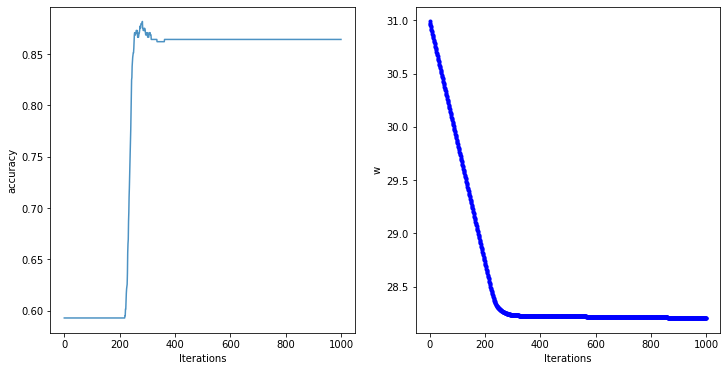

In [242]:
gridsize = (1,2)
fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))


ax1.set_ylabel('accuracy')
ax1.set_xlabel('Iterations')
ax1.plot(range(1000),acc,alpha=0.8)

ax2.set_ylabel('w')
ax2.set_xlabel('Iterations')
_=ax2.plot(range(1000),summ,'b.')
plt.show()

В зависимости от выбранного значения лямбда, может потребоваться меньшее кол-во итераций. Однако, при неправильном подборе параметра, шаг градиентного спуска может "зациклиться" (если шаг градиента очень большой, минимум "перепрыгивается") - розовая линия на графике. или очень медленно приближаться к искомому значению (если шаг градиента очень мал) - красная линия.

/Users/karinahanova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/Users/karinahanova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


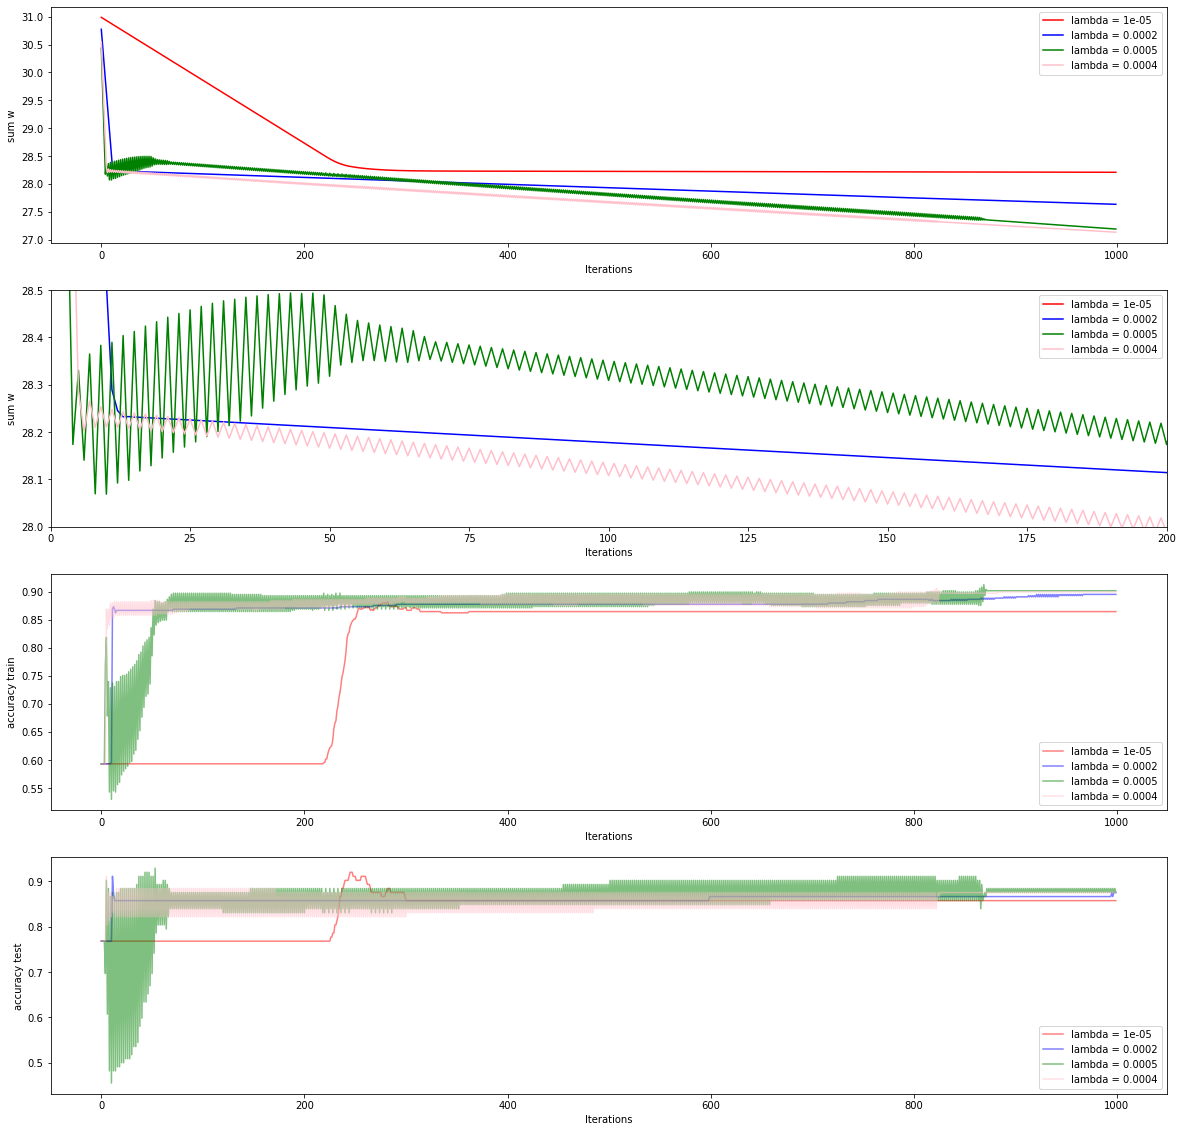

In [258]:
gridsize = (4,1)
fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (1, 0))
ax3 = plt.subplot2grid(gridsize, (2, 0))
ax4 = plt.subplot2grid(gridsize, (3, 0))



for learningRate, col in zip([0.00001, 0.0002, 0.0005, 0.0004],['r','b','g','pink']):
    coef, summ, acc, all_w = gradient_descent(X,y,w,learningRate = learningRate, max_iterations = 1000)
    
    ax1.plot(range(1000),summ,c = col, label = 'lambda = {}'.format(learningRate))
    ax2.set_xlim((0,200))
    ax2.set_ylim((28,28.5))
    ax2.plot(range(1000),summ,c = col, label = 'lambda = {}'.format(learningRate))
    ax3.plot(range(1000),acc,c = col, alpha=0.5, label = 'lambda = {}'.format(learningRate))
    
    test_acc = []
    
    for i in all_w:
        test_acc.append(accuracy(i,X_test1,y_test1))
        
    #ax3.plot([0,1000],[np.mean(acc),np.mean(acc)],c = col, linestyle = 'dotted', label = 'mean train')
    ax4.plot(range(1000),test_acc,c = col,alpha=0.5, label = 'lambda = {}'.format(learningRate))
    #ax4.plot([0,1000],[np.mean(test_acc),np.mean(test_acc)],c = col, linestyle = 'dotted', label = 'mean test')
    
ax1.set_ylabel('sum w')
ax1.set_xlabel('Iterations')
ax1.legend()


ax2.set_ylabel('sum w')
ax2.set_xlabel('Iterations')
ax2.legend()

ax3.set_ylabel('accuracy train')
ax3.set_xlabel('Iterations')
ax3.legend()

ax4.set_ylabel('accuracy test')
ax4.set_xlabel('Iterations')
ax4.legend()

plt.show()